In [1]:
import pandas as pd
import numpy as np

In [2]:
movie_data = pd.read_csv("G:\\Case study\\Recommendation Engine\\KNN Movie Recommendation\\movies.csv")
rating_data = pd.read_csv("G:\\Case study\\Recommendation Engine\\KNN Movie Recommendation\\ratings.csv")

In [3]:
movie_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
pd.Series(movie_data.columns)

0    movieId
1      title
2     genres
dtype: object

In [5]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [6]:
movie_data.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [37]:
rating_data.head()
rating_data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [8]:
dataset = rating_data.merge(movie_data,on='movieId')

In [9]:
dataset.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


# EDA


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [12]:
dataset.groupby('title')['rating'].mean().sort_values(ascending =False).head(10)

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Sorority House Massacre (1986)                   5.0
Bill Hicks: Revelations (1993)                   5.0
My Man Godfrey (1957)                            5.0
Hellbenders (2012)                               5.0
In the blue sea, in the white foam. (1984)       5.0
Name: rating, dtype: float64

In [13]:
dataset.groupby('title')['rating'].count().sort_values(ascending= False).head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

In [14]:
ratings = pd.DataFrame(dataset.groupby('title')['rating'].mean())

In [15]:
ratings['num of votes'] = dataset.groupby('title')['rating'].count()

In [17]:
ratings.head()

,rating,num of votes
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


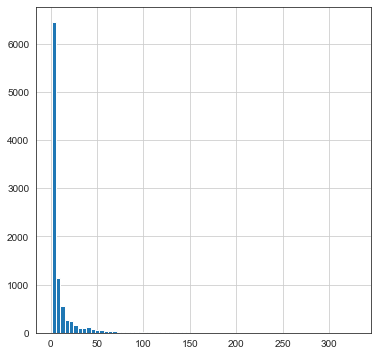

In [19]:
plt.figure(figsize=(6,6))
ratings['num of votes'].hist(bins=70)

(0.5, 5)

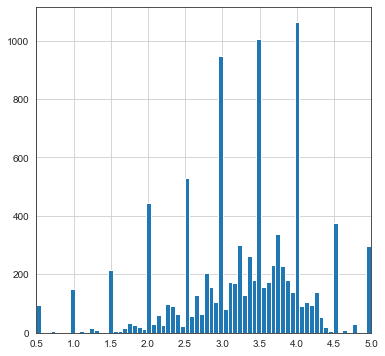

In [23]:
plt.figure(figsize=(6,6))
ratings['rating'].hist(bins =70)
plt.xlim(0.5,5)

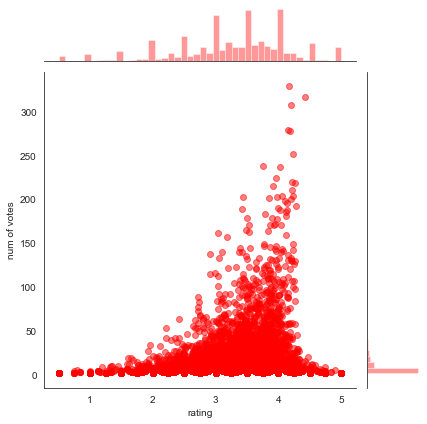

In [25]:
sns.jointplot(x ='rating', y= 'num of votes', data = ratings, alpha =0.5, color = 'red')

In [26]:
movie_pivot = dataset.pivot_table(index='userId',columns='title',values='rating')
movie_pivot.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
ratings.sort_values('num of votes',ascending=False).head()

,rating,num of votes
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [39]:
#finding the correlation between the movies user watched and recommended to watch
matrix_user_rating = movie_pivot['Matrix, The (1999)']
forrestgump_user_rating = movie_pivot['Forrest Gump (1994)']
matrix_user_rating.head() ,forrestgump_user_rating.head()

(userId
 1    5.0
 2    NaN
 3    NaN
 4    1.0
 5    NaN
 Name: Matrix, The (1999), dtype: float64, userId
 1    4.0
 2    NaN
 3    NaN
 4    NaN
 5    NaN
 Name: Forrest Gump (1994), dtype: float64)

In [40]:
similar_to_matrix = movie_pivot.corrwith(matrix_user_rating)
similar_to_forrest = movie_pivot.corrwith(forrestgump_user_rating)

C:\Users\MS\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\MS\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [46]:
corr_matrix = pd.DataFrame(similar_to_matrix, columns= ['Correlation'])
corr_forrestgump = pd.DataFrame(similar_to_forrest,columns = ['Correlation'])
corr_matrix.dropna(inplace= True)
corr_matrix.head()

,Correlation
title,
"'burbs, The (1989)",-0.160843
(500) Days of Summer (2009),0.302316
*batteries not included (1987),0.392232
...And Justice for All (1979),0.654654
10 Cent Pistol (2015),-1.000000


In [47]:
corr_forrestgump.dropna(inplace =True)
corr_forrestgump.head()

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [49]:
corr_matrix =corr_matrix.join(ratings['num of votes'])

In [50]:
corr_matrix[corr_matrix['num of votes'] > 50].sort_values('Correlation', ascending = False).head()

,Correlation,num of votes
title,,
"Matrix, The (1999)",1.000000,278
Slumdog Millionaire (2008),0.613839,71
Kung Fu Panda (2008),0.612549,54
Interstellar (2014),0.599040,73
Legends of the Fall (1994),0.567155,68


In [51]:
corr_forrestgump = corr_forrestgump.join(ratings['num of votes'])

In [53]:
corr_forrestgump[corr_forrestgump['num of votes'] > 50 ].sort_values('Correlation',ascending = False).head()

,Correlation,num of votes
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Pocahontas (1995),0.550118,68
Grumpier Old Men (1995),0.534682,52
Caddyshack (1980),0.520328,52
